# B.T. Func
B.T.: ブラックサンダー

詰め放題参加時にかかった費用を回収した後、何このBTが手元に残るかを求める関数

- 交通費: $C$円
- 参加人数: $N$人
- 参加回数(一人あたり): $M$回
- 手に入るBT(一回あたり): $B_g$個
- 販売価格(一個あたり): $P$円
- 手元に残るBT: $B_r$個
- 手元に残るBT(一人あたり): $\bar{B_r}$

$$
B_r = \frac{(B_gP - 1100)MN - C}{\frac{1100}{B_g}}
$$

In [3]:
import matplotlib.pyplot as plt
import matplotlib_fontja
import numpy as np

In [ ]:
ENTRY_FEE = 1100  # 参加費


def calc_br(c: int, n: int, m: int, bg: int, p: int) -> float:
    """
    手元に残るBTを求める

    Parameters
    ----------
    c : int
        交通費（円）
    n : int
        参加人数
    m : int
        一人あたりの参加回数
    bg : int
        1回あたりで手に入るBT（個数）
    p : int
        BT1個あたりの販売価格（円）

    Returns
    -------
    float
        交通費・参加費を差し引いたあとに手元に残るBT（個）
    """
    return ((bg * p - ENTRY_FEE) * m * n - c) / (1100 / bg)


def calc_br_avg(c: int, n: int, m: int, bg: int, p: int) -> float:
    """
    手元に残るBTを求める(一人当たり)

    Parameters
    ----------
    c : int
        交通費（円）
    n : int
        参加人数
    m : int
        一人あたりの参加回数
    bg : int
        1回あたりで手に入るBT（個数）
    p : int
        BT1個あたりの販売価格（円）

    Returns
    -------
    float
        交通費・参加費を差し引いたあとに手元に残るBT（個）
    """
    return calc_br(c, n, m, bg, p) / n

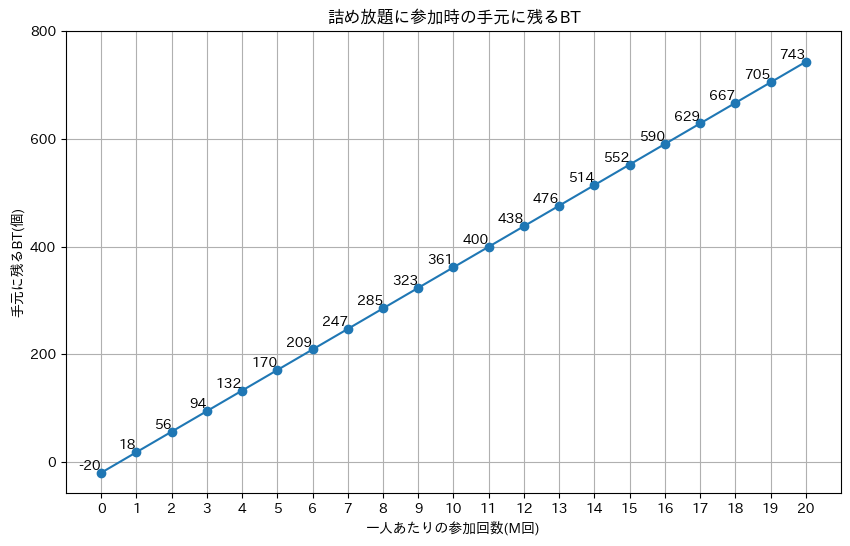

In [34]:
# 詰め放題に参加時の手元に残るBT

c = 1500  # 交通費
n = 4  # 参加人数
bg = 60  # 手に入るBT
p = 30  # 販売価格

m_list = np.arange(0, 21, 1)  # 参加人数
br_list = [calc_br_avg(c, n, m, bg, p) for m in m_list]  # 手元に残るBT

plt.figure(figsize=(10, 6))
plt.plot(m_list, br_list, "o-")
plt.title("詰め放題に参加時の手元に残るBT")
plt.xlabel("一人あたりの参加回数(M回)")
plt.ylabel("手元に残るBT(個)")

for x, y in zip(m_list, br_list):
    plt.text(x, y, f"{y:.0f}", ha="right", va="bottom")

plt.xticks(np.arange(min(m_list), max(m_list) + 1, 1))
plt.yticks(np.arange(0, max(br_list) + 200, 200))
plt.grid()